In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file1 = "Downloads/fast_food_datafiniti.csv"
file2 = "Downloads/acs2017_census_tract_data.csv"

In [3]:
census = pd.read_csv(file2)

In [4]:
census.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [5]:
fastfood = pd.read_csv(file1, encoding = "ISO-8859-1")

In [6]:
fastfood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [7]:
# Create FastFood dataset
ff_id = fastfood['id']
ff_name = fastfood['name']
ff_state = fastfood['province']
dict = {'name': ff_name, 'state': ff_state}  
fastfood_df = pd.DataFrame(dict)

In [8]:
fastfood_df

,name,state
0,SONIC Drive In,LA
1,SONIC Drive In,LA
2,Taco Bell,TN
3,Arby's,TN
4,Steak 'n Shake,GA
5,Wendy's,MI
6,Burger King,MI
7,Chipotle Mexican Grill,CA
8,7-Eleven,NY
9,Dairy Queen,TX


In [9]:
#create a group based on the values in the "state" column
state_group = fastfood_df.groupby('state')
state_group
#count how many times each fastfood restaurant appears in our group
count_fastfoods = state_group['name'].count()
count_fastfoods

state
AK      16
AL       6
AR     102
AZ     330
CA    1201
CO     148
CT      53
DE      44
FL     621
GA     420
HI      32
IA     115
ID      51
IL     405
IN     254
KS      74
KY     166
LA     202
MA     205
MD     172
ME      25
MI     374
MN     199
MO     163
MS      55
MT      38
NC     295
ND      35
NE      87
NH      34
NJ     129
NM      78
NV     121
NY     352
OH     522
OK     166
OR     154
PA     383
RI      15
SC     188
SD      42
TN     302
TX     811
UT      63
VA     253
VT      15
WA     196
WI     189
WV      70
WY      29
Name: name, dtype: int64

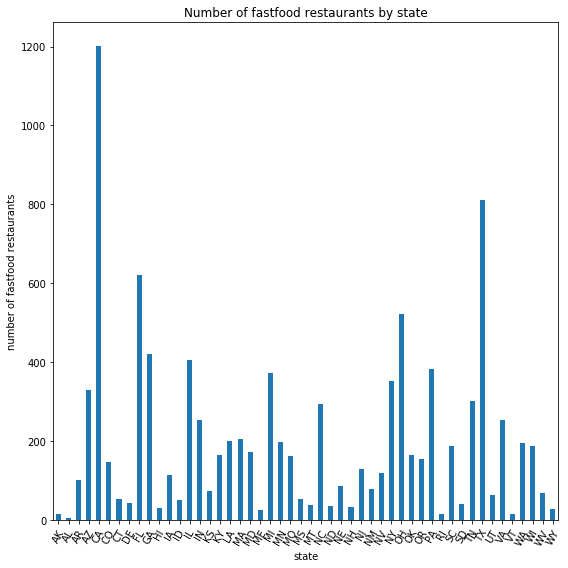

In [10]:
#create bar chart with states on x-axis, and number of fastfood restaurants on y-axis
plt.figure(figsize=(8,8))
count_chart = count_fastfoods.plot(kind="bar", rot=60)


count_chart.set_xlabel("state")
count_chart.set_ylabel("number of fastfood restaurants")
count_chart.set_title("Number of fastfood restaurants by state")

plt.tight_layout()
plt.savefig("number_of_fastfood_restaurants_by_state.png")
plt.show()

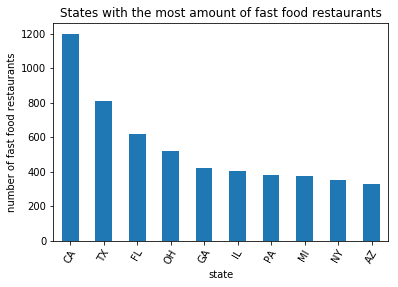

In [11]:
#states with the most amount of fast food restaurants
states = count_fastfoods.nlargest(10)

#bar chart for states with the most amount of fast food restaurants
states_ffs = states.plot(kind="bar", rot=60)
states_ffs.set_xlabel('state')
states_ffs.set_ylabel('number of fast food restaurants')
states_ffs.set_title('States with the most amount of fast food restaurants')

plt.savefig('states_with_many_ffs.png')
plt.show()

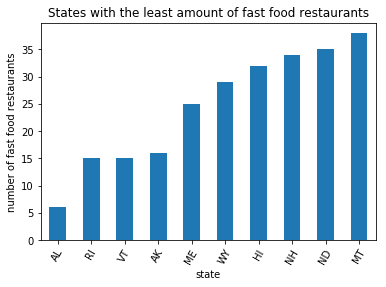

In [12]:
#states with the least amount of fast food restaurants
states_with_few_fastfoods = count_fastfoods.nsmallest(10)

#bar chart for states with the least amount of fast food restaurants
states_with_few_fastfoods = states_with_few_fastfoods.plot(kind="bar", rot=60)
states_with_few_fastfoods.set_xlabel('state')
states_with_few_fastfoods.set_ylabel('number of fast food restaurants')
states_with_few_fastfoods.set_title('States with the least amount of fast food restaurants')

plt.savefig('states_with_few_ffs.png')
plt.show()

In [13]:
#names of all fastfood restaurants in dataset
ff_name = fastfood['name']
dict = {'name': ff_name}

fastfood_df2 = pd.DataFrame(dict)
fastfood_df2

,name
0,SONIC Drive In
1,SONIC Drive In
2,Taco Bell
3,Arby's
4,Steak 'n Shake
5,Wendy's
6,Burger King
7,Chipotle Mexican Grill
8,7-Eleven
9,Dairy Queen


In [14]:
#top 10 fastfood restaurants in dataset
fastfood_group = fastfood_df2.groupby('name')
fastfood_group

count_fastfoods = fastfood_group['name'].count()
count_fastfoods.nlargest(10)


name
McDonald's         1898
Taco Bell          1032
Burger King         833
Subway              776
Arby's              663
Wendy's             628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Domino's Pizza      215
Name: name, dtype: int64

In [15]:
#top 10 fastfood restaurants in dataset

top10fastfoods = count_fastfoods.nlargest(10)

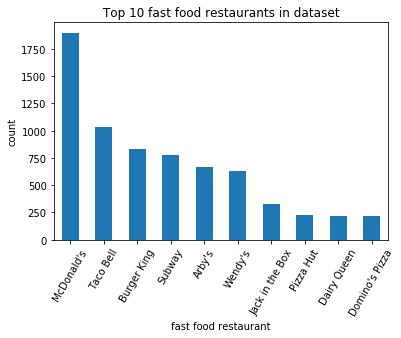

In [16]:
#bar chart for number of fast food restaurants in dataset

count_ffs = top10fastfoods.plot(kind= "bar", rot=60)

count_ffs.set_xlabel("fast food restaurant")
count_ffs.set_ylabel("count")
count_ffs.set_title("Top 10 fast food restaurants in dataset")

plt.savefig('top10fastfoods.png')
plt.show()


In [17]:
#make a city dataframe for each fast food restaurant
ff_name = fastfood['name']
ff_city = fastfood['city']
dict = {'name': ff_name, 'city': ff_city}
fastfood_df3 = pd.DataFrame(dict)

In [18]:
fastfood_df3

,name,city
0,SONIC Drive In,Thibodaux
1,SONIC Drive In,Thibodaux
2,Taco Bell,Pigeon Forge
3,Arby's,Pigeon Forge
4,Steak 'n Shake,Morrow
5,Wendy's,Detroit
6,Burger King,Detroit
7,Chipotle Mexican Grill,Oceanside
8,7-Eleven,Riverhead
9,Dairy Queen,Monahans


In [19]:
#top 10 cities for fast food restaurants
citygroup = fastfood_df3.groupby('city')
citygroup

#count how many times each fastfood restaurant appears in our group
count_fastfoods = citygroup['name'].count()
count_fastfoods.nlargest(10)



city
Houston        107
Las Vegas       82
Phoenix         78
Columbus        72
Dallas          66
Orlando         65
Los Angeles     64
Miami           62
Chicago         57
San Antonio     54
Name: name, dtype: int64

In [20]:
#top 10 cities with the most fast food restaurants

top10cities = count_fastfoods.nlargest(10)

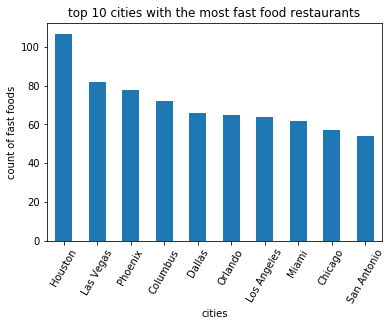

In [21]:
#bar chart for number of fast foods in top 10 cities

count_ffs = top10cities.plot(kind="bar", rot=60)
count_ffs.set_ylabel("count of fast foods")
count_ffs.set_xlabel("cities")
count_ffs.set_title("top 10 cities with the most fast food restaurants")

plt.savefig('top10cities.png')
plt.show()

In [22]:
#10 cities with the least amount of fast food restaurants

cities_with_few_fastfood_restaurants = count_fastfoods.nsmallest(10)

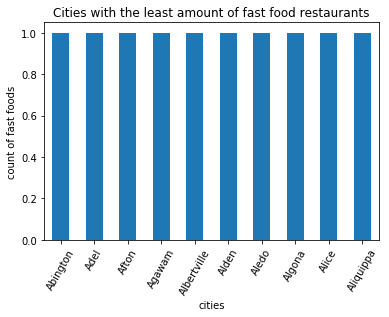

In [23]:
#bar chart for cities with the least amount of fast food restaurants

cities_with_few_fastfood = cities_with_few_fastfood_restaurants.plot(kind="bar", rot= 60)
cities_with_few_fastfood.set_ylabel("count of fast foods")
cities_with_few_fastfood.set_xlabel("cities")
cities_with_few_fastfood.set_title("Cities with the least amount of fast food restaurants")

plt.savefig("cities_with_few_fastfood.png")
plt.show()


In [26]:
#most popular fast food restaurant in each state
df = (fastfood_df.groupby("state", as_index=False)
       .agg({"name":"mode", "name": lambda x: x.value_counts().index[0]}))
df

,state,name
0,AK,Subway
1,AL,Taco Bell
2,AR,McDonald's
3,AZ,McDonald's
4,CA,McDonald's
5,CO,Taco Bell
6,CT,Subway
7,DE,Arby's
8,FL,McDonald's
9,GA,McDonald's
